In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler
import hvplot.pandas

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame

total_retail_df = pd.read_csv(Path("E-Commerce_Total_Retail.csv"), parse_dates=True, index_col="quarter", infer_datetime_format=True)

# Review the DataFrame
total_retail_df.head()

,total_retail_sales,total_e-commerce_sales,e-commerce_percentage,real_disposable_income,real_disposable_income_percentage,personal_saving_percentage_rdi,financial_obligations_percentage_rdi,national_unemployment_rate,mall_vacancies_percentage,positve_e-commerce_change
quarter,,,,,,,,,,
2023-06-30,"1,832,564","269,517",14.71,"16,786",6.23,3.8,14.4534,3.5,NaN,0
2023-03-31,"1,680,614","252,773",15.04,"16,771",6.63,5.2,14.4534,3.4,8.8,0
2022-12-31,"1,857,200","303,120",16.32,"16,602",5.48,4.8,14.4890,3.4,NaN,0
2022-09-30,"1,791,403","252,107",14.07,"16,224",6.44,3.2,14.6865,3.7,NaN,1
2022-06-30,"1,823,059","250,341",13.73,"16,109",6.43,3.2,14.6245,3.5,NaN,0


In [3]:
# Separate the y variable, labels
income_comp_percentage = total_retail_df.drop(columns=["total_retail_sales", "total_e-commerce_sales", "real_disposable_income", "national_unemployment_rate", "mall_vacancies_percentage", "positve_e-commerce_change"])


# Review 
income_comp_percentage.head()


,e-commerce_percentage,real_disposable_income_percentage,personal_saving_percentage_rdi,financial_obligations_percentage_rdi
quarter,,,,
2023-06-30,14.71,6.23,3.8,14.4534
2023-03-31,15.04,6.63,5.2,14.4534
2022-12-31,16.32,5.48,4.8,14.4890
2022-09-30,14.07,6.44,3.2,14.6865
2022-06-30,13.73,6.43,3.2,14.6245


In [4]:
income_comp_percentage.hvplot(
    title="Personal Cash Flow Percentages",
    xlabel="period",
    ylabel="percentage_%",
    rot=90,
    width=1100,
    height=350
)

:NdOverlay   [Variable]
   :Curve   [quarter]   (value)

In [5]:
unemployment_df = total_retail_df.drop(columns=["total_retail_sales", "real_disposable_income_percentage", "total_e-commerce_sales", "real_disposable_income", "mall_vacancies_percentage", "positve_e-commerce_change"])

unemployment_df.hvplot(
    title="National Unemployment Impacts",
    xlabel="period",
    ylabel="percentage_%",
    rot=90,
    width=1100,
    height=350
)

:NdOverlay   [Variable]
   :Curve   [quarter]   (value)

In [6]:
# Isolate Mall Vacancies
mall_vacancies_df = total_retail_df.drop(columns=["total_retail_sales", "total_e-commerce_sales", "real_disposable_income_percentage", "real_disposable_income", "positve_e-commerce_change", "personal_saving_percentage_rdi", "national_unemployment_rate", "financial_obligations_percentage_rdi"])

mall_vacancies_df = mall_vacancies_df.dropna()

mall_vacancies_df.hvplot(
    title="Mall Vacancies vs. e-Commerce Percentage of Retail Sales",
    xlabel="period",
    ylabel="percentage_%",
    rot=90,
    width=1100,
    height=350
)

:NdOverlay   [Variable]
   :Curve   [quarter]   (value)

In [20]:
import pandas as pd

# Source: https://www.bls.gov/news.release/brs1.htm 
total_retail_sales_data = {
    'Date': [6_30_2022, 9_30_2022, 12_31_2022, 3_31_2022, 6_30_2023],  # I had to save the specific dates as integers its causing the bar chart to look a little sloppy because its showing the date as one long number
    'Total Sales': [1823059, 1791403, 1857200, 1680614, 1832564]  # Percentages as floats
}
total_retail_df = pd.DataFrame(total_retail_sales_data)
total_retail_df.set_index('Date', inplace=True)

In [21]:
total_retail_bar_chart = total_retail_df.hvplot.bar(title="Total Retail Sales")
# I had to save the specific dates as integers its causing the bar chart to look a little sloppy because its showing the date as one long number
total_retail_bar_chart

:Bars   [Date]   (Total Sales)

In [31]:
import pandas as pd
import numpy as np


# Assuming the latest sales value is the last entry in the 'Total Sales' column
latest_sales = total_retail_df['Total Sales'].iloc[-1]

# Define parameters for the simulation
num_simulations = 1000
years_to_simulate = 6  # 2023 to 2028, a total of 6 years

simulated_results = pd.DataFrame()

# Run Monte Carlo simulation
for i in range(num_simulations):
    # Generate random walk sales data for the specified years
    simulated_sales = [latest_sales]
    for year in range(1, years_to_simulate):
        sales_change = np.random.normal(0.03, 0.05)  # Assume a mean growth rate of 3% with a 5% standard deviation
        next_year_sales = simulated_sales[-1] * (1 + sales_change)
        simulated_sales.append(next_year_sales)

    # Round the simulated sales to two decimal places
    simulated_sales = np.round(simulated_sales, 2)
    
    # Store the simulated data in the DataFrame as a new column for each simulation
    simulated_results[f"Simulation {i+1}"] = simulated_sales

# Create a date range for the future years
future_years = pd.date_range(start=str(2023), periods=years_to_simulate, freq='Y')

# Set the index to represent future years
simulated_results.index = future_years

# Review the simulated sales data
print(simulated_results.head())


            Simulation 1  Simulation 2  Simulation 3  Simulation 4  \
2023-12-31    1832564.00    1832564.00    1832564.00    1832564.00   
2024-12-31    1795990.26    1869776.08    1944730.16    1931171.60   
2025-12-31    1774483.94    1830075.88    1794936.15    1909963.37   
2026-12-31    1903946.68    1885399.88    1983805.57    1922505.22   
2027-12-31    1793101.15    2050943.29    1931891.57    1794793.56   

            Simulation 5  Simulation 6  Simulation 7  Simulation 8  \
2023-12-31    1832564.00    1832564.00    1832564.00    1832564.00   
2024-12-31    1757567.13    1872689.98    1880063.67    1961507.95   
2025-12-31    1831977.44    1910285.13    2042637.45    2120535.84   
2026-12-31    1863684.37    1972631.44    2152745.36    2333181.88   
2027-12-31    1941265.29    1927269.07    2056789.44    2400252.59   

            Simulation 9  Simulation 10  ...  Simulation 991  Simulation 992  \
2023-12-31    1832564.00     1832564.00  ...      1832564.00      1832564.00  

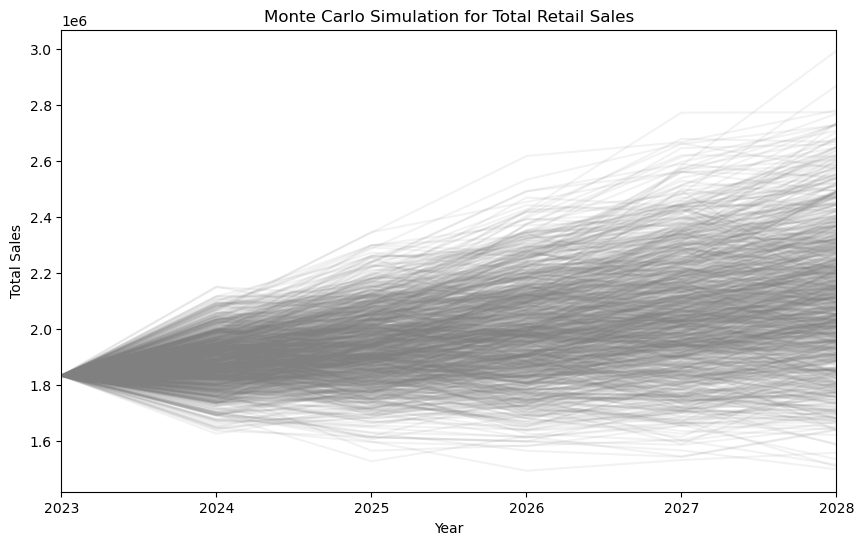

In [34]:
import matplotlib.pyplot as plt 
# Plot the Monte Carlo simulation results
simulated_results.plot(legend=False, color='grey', alpha=0.1, figsize=(10, 6))
plt.title('Monte Carlo Simulation for Total Retail Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()
